**Deep Learning with TensorFlow**

**Importing some Basic Libraries**

In [14]:
!pip install squarify

In [15]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import squarify

# keras
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras


2.3.0


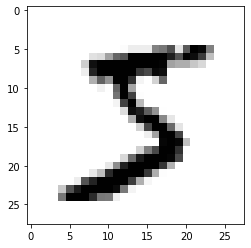

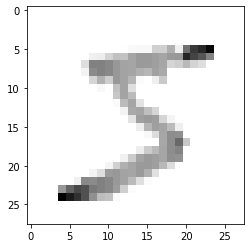

In [16]:
#Identifying handwritten digits
#There are many ways to solve this other, and one of ways I found is
#https://www.kaggle.com/uysimty/get-start-image-classification

# print(tf.__version__)
### LOAD DATA ###
mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

### Normalizing input data, x_train, x_test ### 
# Normalization is a rescaling of the data from the original range 
# so that all values are within the range of 0 and 1.
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/normalize
# https://stackoverflow.com/questions/52812815/what-does-keras-normalize-axis-argument-does
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# print(x_train[0]) #after normalizing input
 
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()



In [17]:
### PICK A MODEL ###
model = tf.keras.models.Sequential()

### MODEL LAYERS: Dense, Conv2D, MaxPooling2D, etc with activation ###
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
model.add(tf.keras.layers.Flatten()) #input layer: we want to flatten it (unroll) instead of multi dimentional array
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #hidden layer with 128 units
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #second hidden layer. Relu is default activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer with 10 classification

### TRAIN AND OPTIMIZE: model.compile, model.fit
#train this model. Min loss is what we want to optimize, not accuracy.
#adam optimizer ( Mini batch gradient descent with momentum+RMS prop) https://www.coursera.org/learn/deep-neural-network/lecture/w9VCZ/adam-optimization-algorithm
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 849us/step - loss: 0.2615 - accuracy: 0.9236
Epoch 2/3
1875/1875 [==============================] - 2s 844us/step - loss: 0.1055 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 2s 837us/step - loss: 0.0712 - accuracy: 0.9773


In [18]:
#Since accuracy is pretty good (97%), check if we are overfitting with test data
val_loss, val_acc = model.evaluate (x_test, y_test)
print(val_loss, val_acc)


313/313 [==============================] - 0s 550us/step - loss: 0.0924 - accuracy: 0.9725
0.09238238632678986 0.9725000262260437


In [19]:
#train vs test data set gave similar result. good to go
#save the model
model.save('v1_num_reader.model')

INFO:tensorflow:Assets written to: v1_num_reader.model/assets


In [21]:

#to load model
new_model = tf.keras.models.load_model('v1_num_reader.model')
predictions = new_model.predict([x_test])


In [22]:
#print probability distribution
print(predictions)

[[4.66586725e-09 3.59466782e-07 1.67215730e-05 ... 9.99972224e-01
  2.66982725e-09 1.70962924e-08]
 [6.84150653e-12 7.97803659e-05 9.99918342e-01 ... 4.91227337e-10
  4.66499062e-10 1.36951729e-13]
 [5.65548355e-08 9.99746263e-01 1.12222115e-05 ... 4.96788016e-05
  3.73614203e-05 2.37192194e-06]
 ...
 [5.42420830e-10 2.81432534e-07 3.13770165e-08 ... 2.15601012e-05
  6.99371810e-07 1.46581488e-05]
 [6.82613154e-06 4.44934827e-08 1.24916156e-07 ... 7.06455103e-06
  6.46367145e-04 1.45694273e-07]
 [1.59876059e-08 2.73866636e-08 6.22584224e-08 ... 2.40206854e-10
  1.66286114e-07 5.19260368e-09]]


In [26]:
print(np.argmax(predictions[10])) #prediction for x_test[10]

0


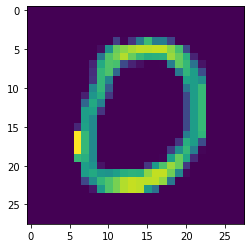

In [27]:
plt.imshow(x_test[10])
plt.show()

2


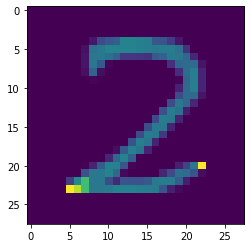

In [30]:
print(np.argmax(predictions[225])) #prediction for x_test[225]
plt.imshow(x_test[225])
plt.show()